In [1]:
import pandas as pd
import numpy as np
import re
from matplotlib import pyplot as plt
import scipy.stats as stats

comebacks = pd.read_csv('playoffComebacks.csv')
leads = pd.read_csv('playoffLeads.csv')
comeback_mean = []
lead_mean = []
years = range(1997, 2025)
    
for col in leads.columns:
    sum = 0
    clean_col = leads[col].dropna()
    for point in clean_col:
        sum += point
    sum /= len(clean_col)
    lead_mean.append(sum)

for col in comebacks.columns:
    sum = 0
    clean_col = comebacks[col].dropna()
    for point in clean_col:
        sum += point
    sum /= len(clean_col)
    comeback_mean.append(sum)

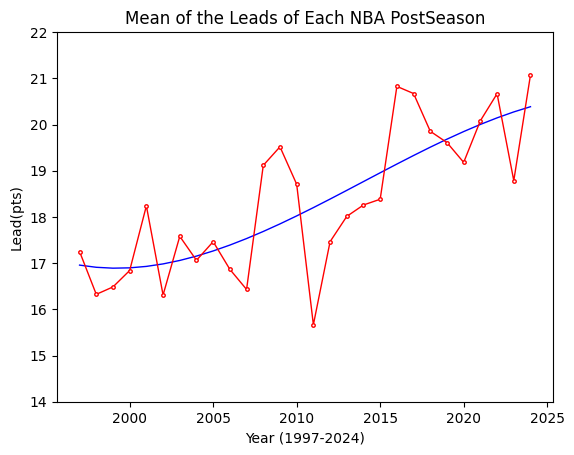

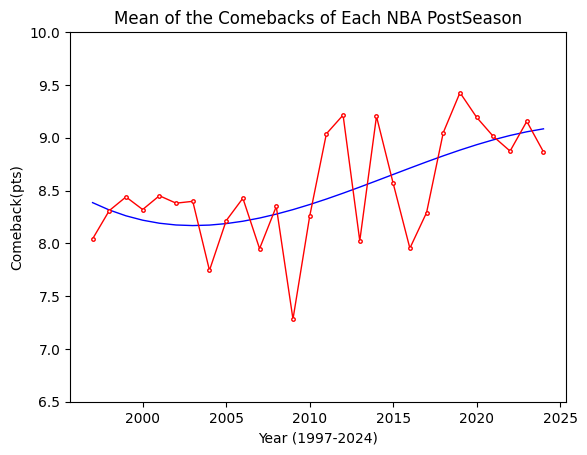

In [2]:
coefficients = np.polyfit(years, lead_mean, deg=3)
trendline = np.poly1d(coefficients)
trendline_y = trendline(years)
plt.plot(years, trendline_y, color='blue', linewidth=1)
plt.plot(years, lead_mean, color='red', linewidth=1, marker='.', markersize=5, markerfacecolor='white')
plt.ylim(14,22)
plt.ylabel('Lead(pts)')
plt.xlabel('Year (1997-2024)')
plt.title('Mean of the Leads of Each NBA PostSeason')
plt.show()


coefficients = np.polyfit(years, comeback_mean, deg=3)
trendline = np.poly1d(coefficients)
trendline_y = trendline(years)
plt.plot(years, trendline_y, color='blue', linewidth=1)
plt.plot(years, comeback_mean, color='red', linewidth=1, marker='.', markersize=5, markerfacecolor='white')
plt.ylim(6.5,10)
plt.ylabel('Comeback(pts)')
plt.xlabel('Year (1997-2024)')
plt.title('Mean of the Comebacks of Each NBA PostSeason')
plt.show()

In [3]:
yearsLeads = ['2009', '2011', '2016']
yearsComebacks = ['2009', '2012', '2015']
playoffLeadsCleaned= []
playoffComebacksCleaned = []
for year in yearsLeads:
    leadsCol = leads[year]
    cleanCol = leadsCol.dropna()
    clean = list()
    for cell in cleanCol:
        clean.append(cell)  
    clean = np.array(clean)
    playoffLeadsCleaned.append(clean)

for year in yearsComebacks:
    comebCol = comebacks[year]
    cleanCol = comebCol.dropna()
    clean = list()
    for cell in cleanCol:
        clean.append(cell)      
    clean = np.array(clean)
    playoffComebacksCleaned.append(clean)

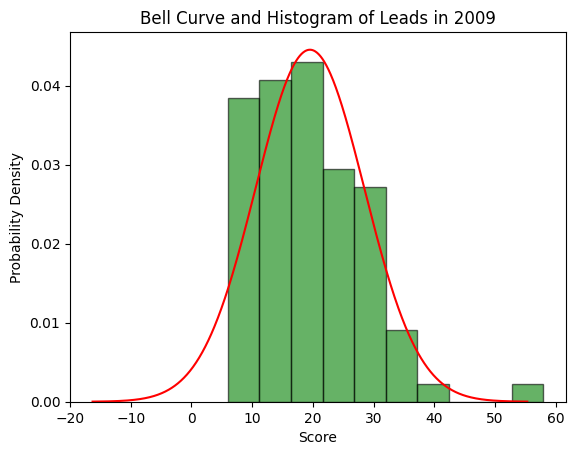

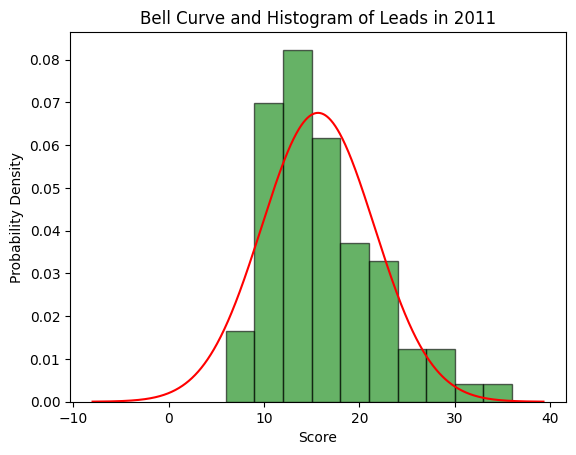

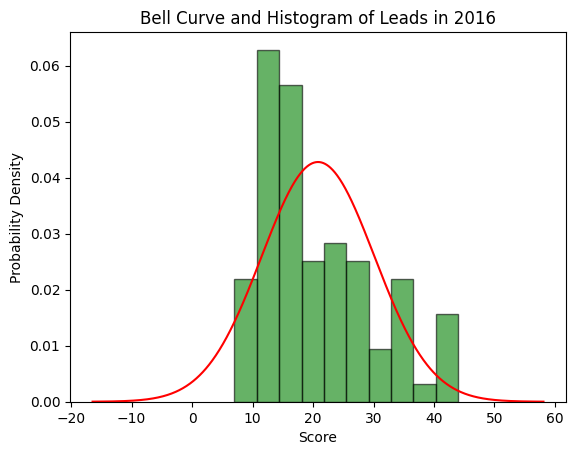

In [4]:
for idx, clean in enumerate(playoffLeadsCleaned):
    games = range(1,len(clean)+1)
    std_dev = np.std(clean)
    mean = np.mean(clean)
    x = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 1000)
    y = stats.norm.pdf(x, mean, std_dev)
    plt.hist(clean, bins=10, density=True, alpha=0.6, color='g', edgecolor='black')
    plt.plot(x, y, color='red')
    plt.xlabel('Score')
    plt.ylabel('Probability Density')
    plt.title(f'Bell Curve and Histogram of Leads in {yearsLeads[idx]}')
    plt.show()


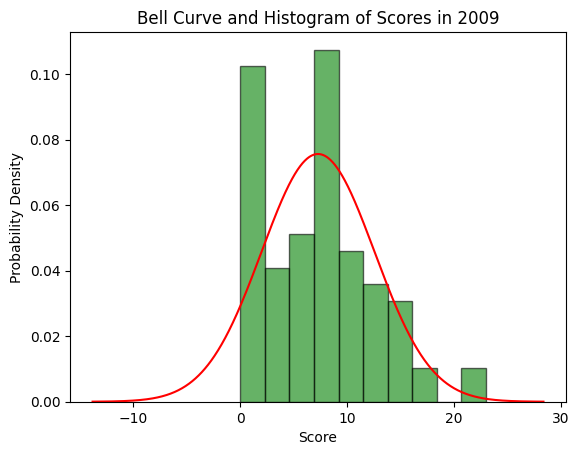

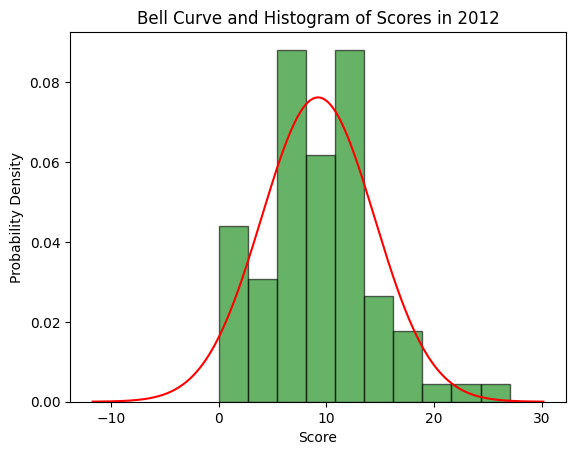

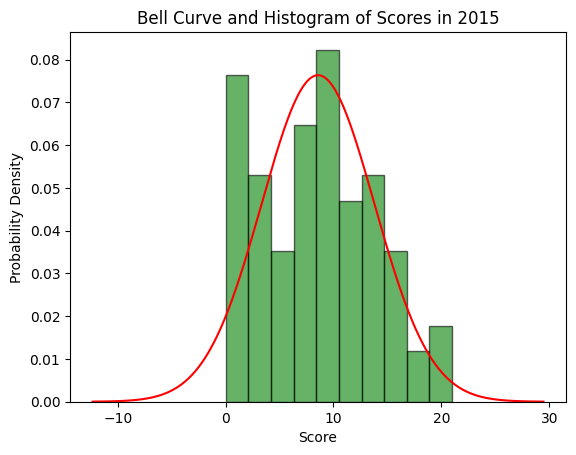

In [5]:
for idx, clean in enumerate(playoffComebacksCleaned):
    games = range(1,len(clean)+1)
    std_dev = np.std(clean)
    mean = np.mean(clean)
    x = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 1000)
    y = stats.norm.pdf(x, mean, std_dev)
    plt.hist(clean, bins=10, density=True, alpha=0.6, color='g', edgecolor='black')
    plt.plot(x, y, color='red')
    plt.xlabel('Score')
    plt.ylabel('Probability Density')
    plt.title(f'Bell Curve and Histogram of Scores in {yearsComebacks[idx]}')
    plt.show()

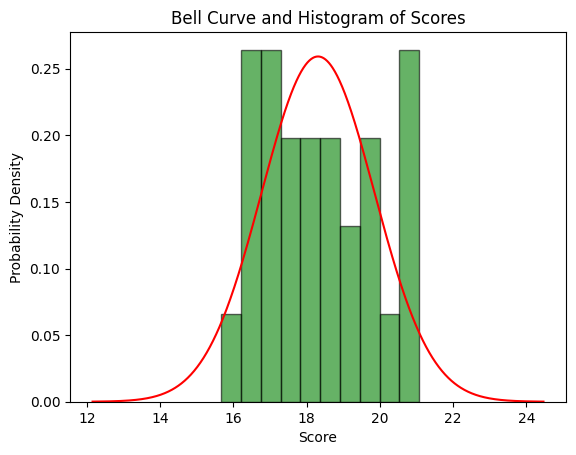

In [6]:
games = range(1,len(lead_mean)+1)
std_dev = np.std(lead_mean)
mean = np.mean(lead_mean)
x = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 1000)
y = stats.norm.pdf(x, mean, std_dev)
plt.hist(lead_mean, bins=10, density=True, alpha=0.6, color='g', edgecolor='black')
plt.plot(x, y, color='red')
plt.xlabel('Score')
plt.ylabel('Probability Density')
plt.title('Bell Curve and Histogram of Scores')
plt.show()

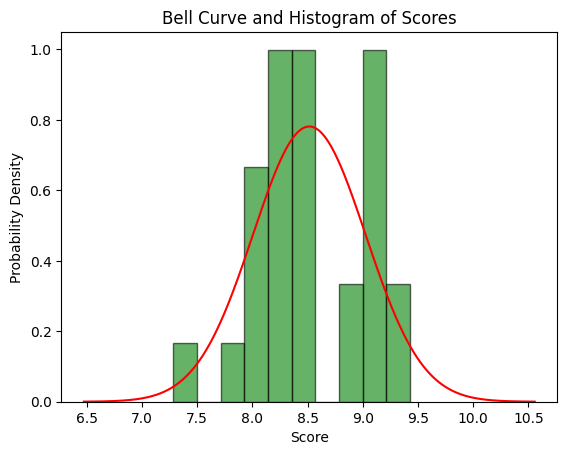

In [7]:
games = range(1,len(comeback_mean)+1)
std_dev = np.std(comeback_mean)
mean = np.mean(comeback_mean)
x = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 1000)
y = stats.norm.pdf(x, mean, std_dev)
plt.hist(comeback_mean, bins=10, density=True, alpha=0.6, color='g', edgecolor='black')
plt.plot(x, y, color='red')
plt.xlabel('Score')
plt.ylabel('Probability Density')
plt.title('Bell Curve and Histogram of Scores')
plt.show()

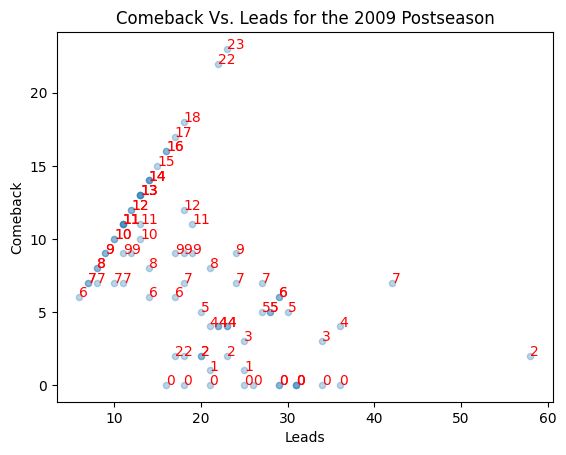

In [11]:
cleanL = playoffLeadsCleaned[0]
cleanCB = playoffComebacksCleaned[0]
plt.scatter(cleanL, cleanCB, s=20, alpha=0.3)
plt.ylabel('Comeback')
plt.xlabel('Leads')
plt.title('Comeback Vs. Leads for the 2009 Postseason')
for i, txt in enumerate(cleanCB):
    plt.annotate(txt, (cleanL[i], cleanCB[i]), xytext=(cleanL[i], cleanCB[i]), color='red')
'''for i, txt in enumerate(cleanL):
    plt.annotate(txt, (cleanL[i], cleanCB[i]), xytext=(cleanL[i]+1, cleanCB[i]-1), color='brown')'''

plt.show()
